# Social Spreading


### The Watts–Strogatz Small-World Model

<img src="create_circle.png">
<img src="wsm.png">

Fuente: Latora et al (2017)

In [1]:
import sys
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import random
import numpy as np

class WattsStrogatz:
    """docstring for WattsStrogatz.
    Parámetros:
        - G (networkx empty Graph):
        - N (entero): Cantidad de nodos
        - m (entero): Cantidad de conexiones entre nodos
        - p (float): Probabilidad de desconexión
    """
    def __init__(self, G, N, m, p):
        self.G = G
        self.N = N
        self.m = m
        self.p = p

    def inicializa_graph(self):
        """
        El método  inicializa_graph inicializa la gráfica
        con m conexiones entre los nodos vecinos
        """
        self.G.add_nodes_from([x for x in range(self.N)])
        # Agregamos las conexiones
        for i in range(self.N):
            for j in range(1,(self.m+1)):
                label = (i + j) % (self.N)
                self.G.add_edge(i,label)

    def Watts_Strogatz_model(self):
        """
        El método  Watts_Strogatz_model ejecuta el Modelo
        Watts-Strogatz con una probabilidad de desconexión p
        """
        nodos = set(range(self.N))
        for i in range(self.N):
            for j in range(1,(self.m+1)):
                label = (i + j) % (self.N)
                epsilon = random.uniform(0, 1)
                if epsilon < self.p:
                    candidatos = nodos - {i} - set(self.G[i])
                    j_p = np.random.choice(list(candidatos))
                    G.remove_edge(i,label)
                    G.add_edge(i,j_p)


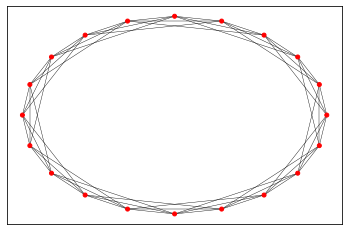

In [2]:
# Generamos una gráfica vacía
G=nx.Graph()
# Definimos los parámetros
N = 20
m = 3
p = 0.1

### Generamos una instancia de la clase
WSG = WattsStrogatz(G,N,m,p,)

### Inicializamos y visualizamos la gráfica
WSG.inicializa_graph()
nx.draw_networkx(WSG.G, pos=nx.circular_layout(WSG.G),node_size=[16]*N,width=[0.4]*N,with_labels=False, node_color="r")
plt.show()

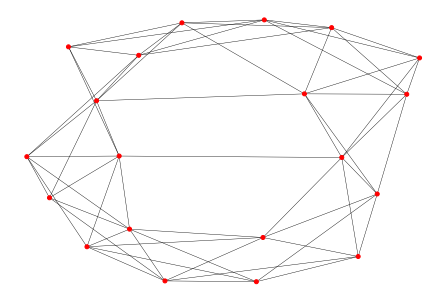

In [3]:
### Modelo Watts Strogatz
WSG.Watts_Strogatz_model()
nx.draw(WSG.G, node_size=[16]*N ,width=[0.4]*N, node_color="r")
plt.show()

### Simple contagion (Platt, 2019)

#### Anillo

Un contagio simple es un proceso social en que cada individuo es infectado despues de una sola exposición. Este tipo de contagio es un buen modelo para enfermedades altamente contagiosas o la difusión de información no controvertida.

El siguiente código simula un contagio simple. El estado de la infección se almacena en el atributo del nodo infectado. En cada paso de tiempo, los vecinos de todos los nodos actualmente infectados se marcan como infectados

In [4]:
def propagate_simple(G):
    to_infect = set([])
    #  Busca los nodos contagiados
    for v in G.nodes():
        if G.nodes[v]['infected'] == False:
        # Marca todos los vecinos a contagiar
            for w in nx.neighbors(G, v):
                if G.nodes[w]['infected']:
                    to_infect.add(v)
                    break
    # Contagia los nodos marcados
    for v in to_infect:
        G.nodes[v]['infected'] = True

Veamos cómo los contagios simples se propagan a través de una red de anillo. Comenzamos con dos
nodos infectados:

In [5]:
# Generamos una gráfica vacía
G=nx.Graph()
# Definimos los parámetros
N = 40
m = 3
p = 0.1

### Generamos una instancia de la clase
G_small_ring = WattsStrogatz(G,N,m,p,)

### Inicializamos el anillo
G_small_ring.inicializa_graph()
nx.set_node_attributes(G_small_ring.G, dict((i, False) for i in range(40)),'infected')

for i in range(2):
    G_small_ring.G.nodes[i]['infected'] = True


Se permite que el contagio se propague de los nodos infectados a los vecinos dos veces:

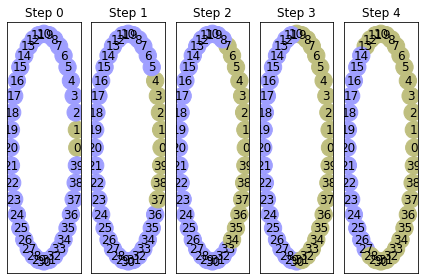

In [6]:
for i in range(5):
    plt.subplot(1, 5, i + 1)
    node_color = ['#bfbf7f' if G_small_ring.G.nodes[v]['infected'] else '#9f9fff' for v in G_small_ring.G.nodes]
    nx.draw_networkx(
    G_small_ring.G,
    pos=nx.circular_layout(G_small_ring.G),
    node_color=node_color)
    propagate_simple(G_small_ring.G)
    plt.title("Step {}".format(i))
plt.tight_layout()

#### Watts-Strogatz

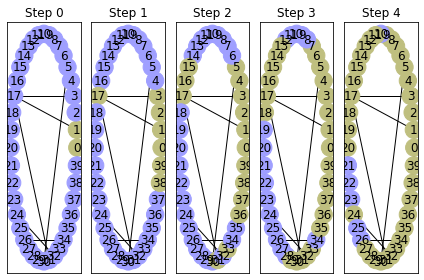

In [38]:
# Generamos una gráfica vacía
G=nx.Graph()
# Definimos los parámetros
N = 40
m = 2
p = 0.1

### Generamos una instancia de la clase
G_watts_strogatz = WattsStrogatz(G,N,m,p,)

### Inicializamos el anillo
G_watts_strogatz.inicializa_graph()
### Modelo Watts Strogatz
G_watts_strogatz.Watts_Strogatz_model()
nx.set_node_attributes(G_watts_strogatz.G, dict((i, False) for i in range(40)),'infected')

for i in range(2):
    G_watts_strogatz.G.nodes[i]['infected'] = True


for i in range(5):
    plt.subplot(1, 5, i + 1)
    node_color = ['#bfbf7f' if G_watts_strogatz.G.nodes[v]['infected'] else '#9f9fff' for v in G_watts_strogatz.G.nodes]
    nx.draw_networkx(G_watts_strogatz.G,pos=nx.circular_layout(G_small_ring.G),node_color=node_color)
    #nx.draw_networkx(G_watts_strogatz.G,  node_color=node_color)
    propagate_simple(G_watts_strogatz.G)
    plt.title("Step {}".format(i))
plt.tight_layout()